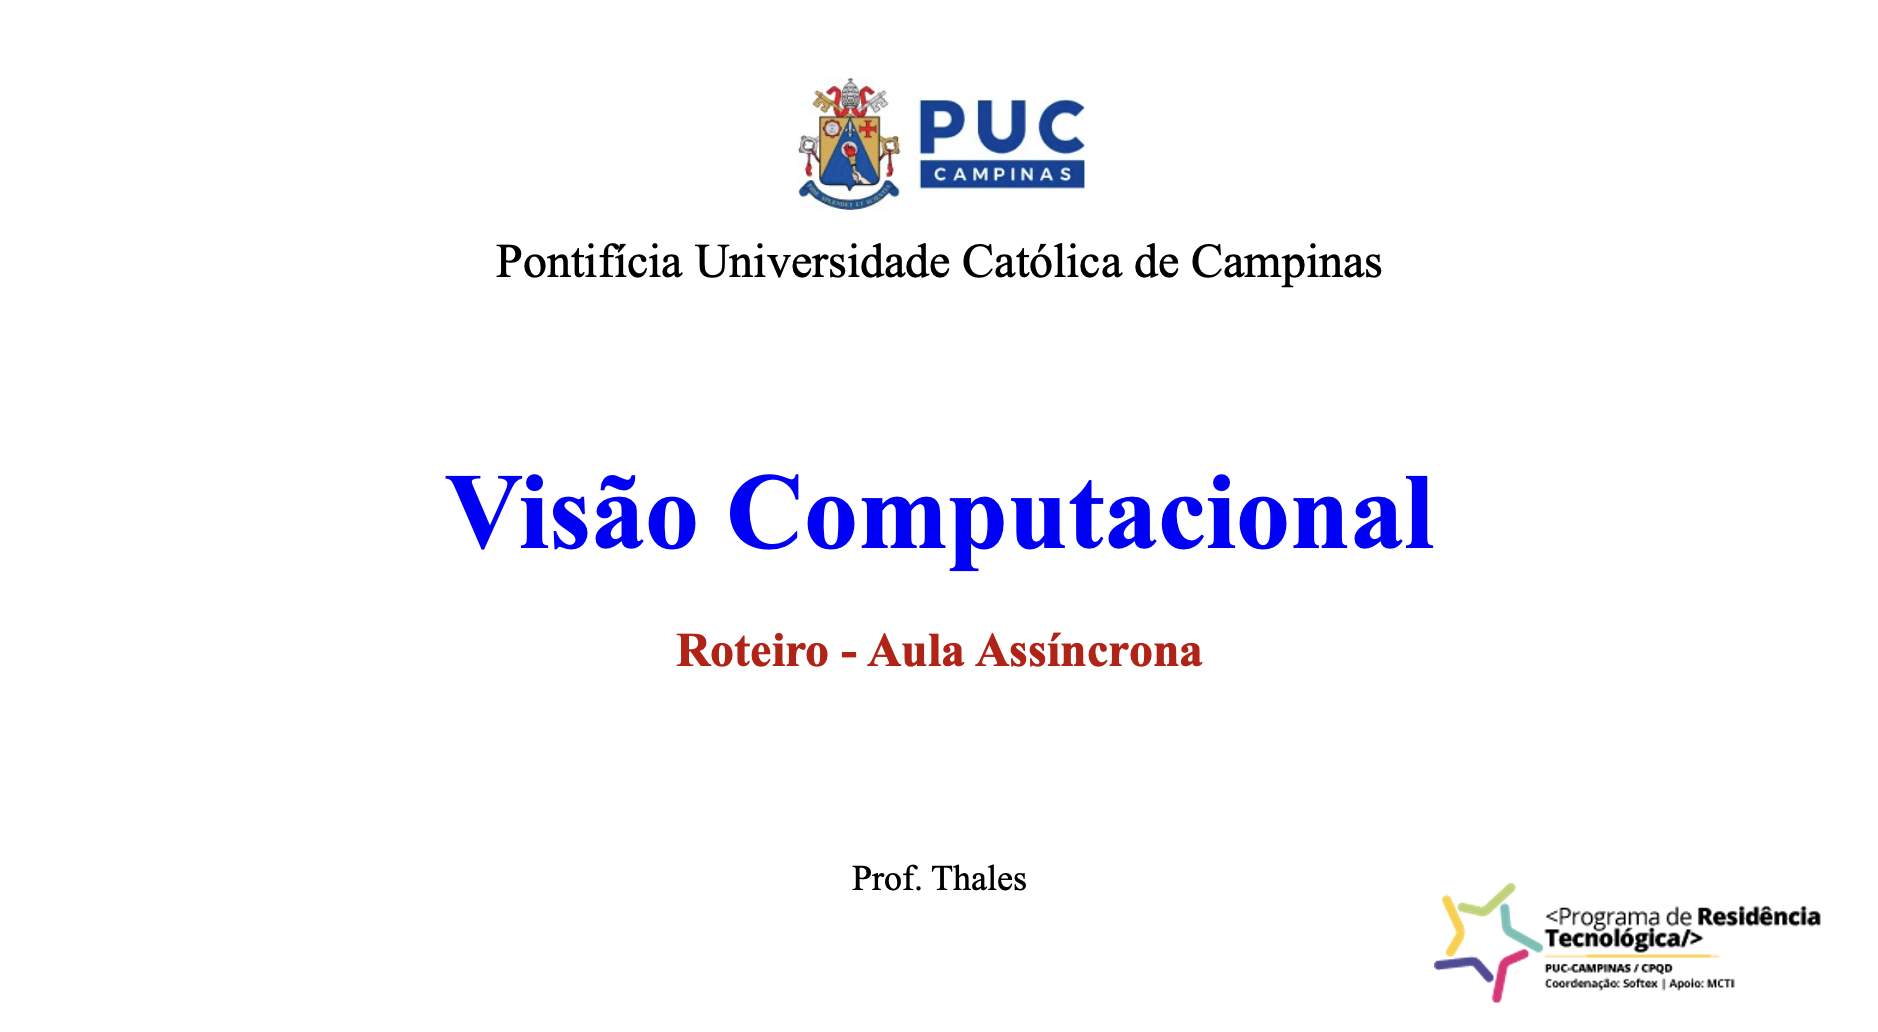



---



---

# **Tópico I: Criando uma rede neural sem a Flatten:**

## Acompanhe o código abaixo:

In [27]:
# Importando o tensorflow:
import tensorflow as tf

# Carregando o dataset:
mnist = tf.keras.datasets.mnist

# Carregando a base de dados já particionada:
(XX, y),(_, _) = mnist.load_data()
XX = XX.reshape(XX.shape[0], 28*28)

# Normalização:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(XX)

# Particionando o dado:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Convertendo o problema em uma classificação binária
y_train_binary = (y_train >= 5).astype('int')  # Classes 0 para digitos de 0 a 4, Classes 1 para digitos de 5 a 9
y_test_binary = (y_test >= 5).astype('int')

In [28]:
# Dimensão do Input Shape:
28 * 28

784

In [29]:
# Podemos seguir uma recomendação de número de neurônios para a primeira camada intermediária.
# No entando, esta não é uma regra universal.

# Implementando a recomendação:
número_de_classes = 2
número_de_neuronios_camada_oculta = (784 + número_de_classes) / 2
número_de_neuronios_camada_oculta

393.0

In [30]:
# Entrada -> Oculta -> Oculta -> Saída
# 784 -> 393 -> 393 -> 1
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape = (784,), units = 393, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 393, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

network1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 393)               308505    
                                                                 
 dense_23 (Dense)            (None, 393)               154842    
                                                                 
 dense_24 (Dense)            (None, 1)                 394       
                                                                 
Total params: 463,741
Trainable params: 463,741
Non-trainable params: 0
_________________________________________________________________


In [31]:
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
historico = network1.fit(x_train, y_train_binary, epochs = 50)

Epoch 1/50
1500/1500 [==============================] - 6s 3ms/step - loss: 0.1144 - accuracy: 0.9565
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9812
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0390 - accuracy: 0.9860
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0296 - accuracy: 0.9899
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0231 - accuracy: 0.9920
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0179 - accuracy: 0.9936
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0153 - accuracy: 0.9947
Epoch 8/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0136 - accuracy: 0.9951
Epoch 9/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0123 - accuracy: 0.9960
Epoch 10/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.010

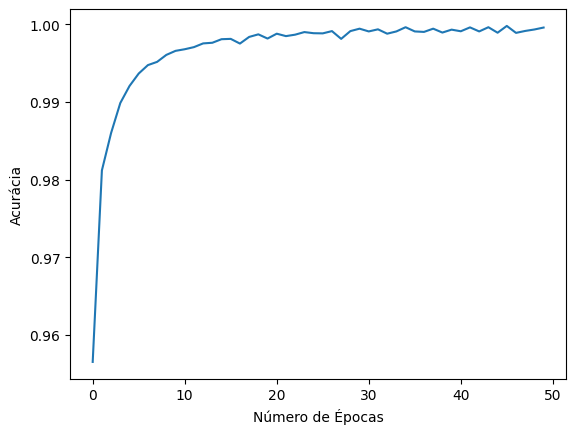

In [33]:
historico.history.keys()

import matplotlib.pyplot as plt
plt.plot(historico.history['accuracy']);

plt.xlabel("Número de Épocas")
plt.ylabel("Acurácia")

plt.show()

In [34]:
pred = network1.predict(x_test)
pred = (pred > 0.5)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_binary, pred)

print('Acurácia Obtida: ',acc*100)

375/375 [==============================] - 1s 2ms/step
Acurácia Obtida:  98.79166666666667


## **Tópico II: Agora é a sua vez:**

- Proponha uma arquitetura que supere o resultado anterior.


In [45]:
# Carregando o dataset MNIST
mnist = tf.keras.datasets.mnist
(XX, y), (_, _) = mnist.load_data()
XX = XX.reshape(XX.shape[0], 28, 28, 1)  # Adicionando uma dimensão para canais (1 para imagens em escala de cinza)

# Normalização
scaler = MinMaxScaler()
X = scaler.fit_transform(XX.reshape(-1, 28*28))  # Aplique a normalização

# Particionando o dado
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertendo o problema em uma classificação binária
y_train_binary = (y_train >= 5).astype('int')
y_test_binary = (y_test >= 5).astype('int')

In [46]:
# Criando a CNN
model = tf.keras.models.Sequential()

# Camadas de convolução e max-pooling
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Flatten
model.add(tf.keras.layers.Flatten())

# Camadas totalmente conectadas
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_35 (Dense)            (None, 64)              

In [47]:
# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento
hist = model.fit(x_train.reshape(-1, 28, 28, 1), y_train_binary, epochs=50, batch_size=64)

Epoch 1/50
750/750 [==============================] - 4s 4ms/step - loss: 0.1212 - accuracy: 0.9525
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0425 - accuracy: 0.9852
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0298 - accuracy: 0.9901
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0225 - accuracy: 0.9924
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0173 - accuracy: 0.9943
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0134 - accuracy: 0.9955
Epoch 7/50
750/750 [==============================] - 3s 5ms/step - loss: 0.0111 - accuracy: 0.9964
Epoch 8/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0099 - accuracy: 0.9967
Epoch 9/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0075 - accuracy: 0.9975
Epoch 10/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0058 - accuracy: 0.9982

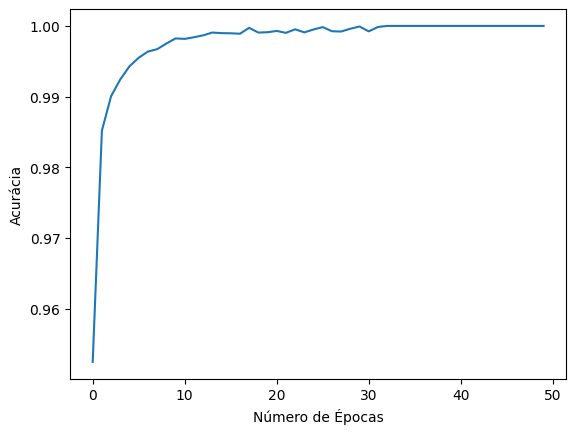

In [48]:
hist.history.keys()

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy']);

plt.xlabel("Número de Épocas")
plt.ylabel("Acurácia")

plt.show()

In [49]:
# Avaliação da acurácia no conjunto de teste
y_pred = model.predict(x_test.reshape(-1, 28, 28, 1))
y_pred_binary = (y_pred > 0.5).astype('int')
acc = accuracy_score(y_test_binary, y_pred_binary)
print('Acurácia Obtida: ', acc * 100)

375/375 [==============================] - 1s 2ms/step
Acurácia Obtida:  99.45
